In [312]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from functions import Read_data 
from functions import fix_set_poverty_member
from functions import rep_null_val
from functions import replace_yes_no
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
pd.pandas.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [212]:
# write a function to show distribution and outlier plots for variable in pandas data frame 

In [213]:
income_train_df=Read_data('train.csv')

In [214]:
def pipeline(df):
    df1=replace_yes_no(df)
    df2=rep_null_val(df)
    df3=fix_set_poverty_member(df)
    return df3
def find_value_count(df):
    return 

In [215]:
income_train_df=pipeline(income_train_df)

In [216]:
Square_variables = [x for x in income_train_df if x.startswith('SQB')]

Removing Square variables 

In [218]:
income_train_df.drop(Square_variables,axis=1,inplace=True)

In [219]:
income_train_df.drop('agesq',inplace=True,axis=1)

In [220]:
float_columns=income_train_df.select_dtypes('float').columns.tolist()
int_columns=income_train_df.select_dtypes('int').columns.tolist()
object_columns=income_train_df.select_dtypes('object').columns.tolist()

In [221]:
#continous 
#categorical
#encoding 
#numerical distribution ,outlier 

In [222]:
nominal_cols=['rooms','r4h1','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2']
yes_no=['hacdor','hacapo','v14a','refrig','v18q','r4h2']

In [326]:
yes_no_columns=[]
nominal_cols=[]
continous_cols=[]
garbage_col=[]
for i in int_columns+float_columns:
    if  income_train_df[i].nunique()==1:
        garbage_col.append(i)
    elif income_train_df[i].nunique()==2:
        yes_no_columns.append(i)
    elif income_train_df[i].nunique()>2 and income_train_df[i].nunique()<=38:
        nominal_cols.append(i)
    else:
        continous_cols.append(i)

In [327]:
# continous columns 
print(f"We have {len(continous_cols)} continous columns the name of the columns are as follows:")
print(continous_cols)

We have 3 continous columns the name of the columns are as follows:
['age', 'v2a1', 'meaneduc']


#   Continous Variable

In [328]:
#Univariate continous analysis 

In [329]:

pd.DataFrame((income_train_df[continous_cols].describe().T).reset_index())

,index,count,mean,std,min,25%,50%,75%,max
0,age,9557.0,34.303547,21.612261,0.0,17.0,31.0,51.0,97.0
1,v2a1,9557.0,46628.611908,109167.146196,0.0,0.0,0.0,45000.0,2353477.0
2,meaneduc,9557.0,9.230042,4.168552,0.0,6.0,9.0,11.6,37.0


[]

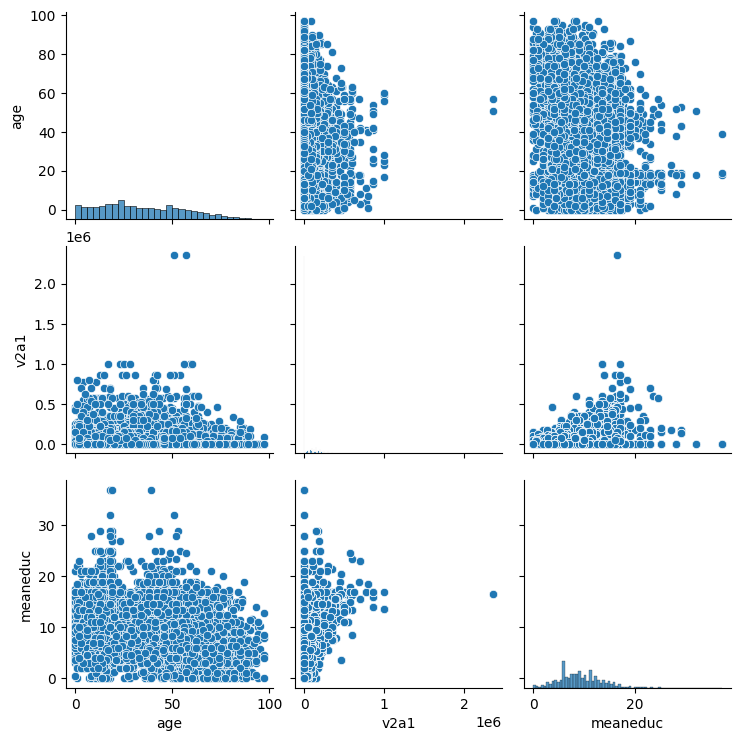

In [330]:
sns.pairplot(income_train_df[continous_cols])
plt.plot()

In [331]:
#Continous variable Bivariate analysis with target variable 
#*ANNOVA TEST 

In [332]:
continous_cols

['age', 'v2a1', 'meaneduc']

Age
v2a1: Monthly Rent 
meaneduc:Average Year of education 18+

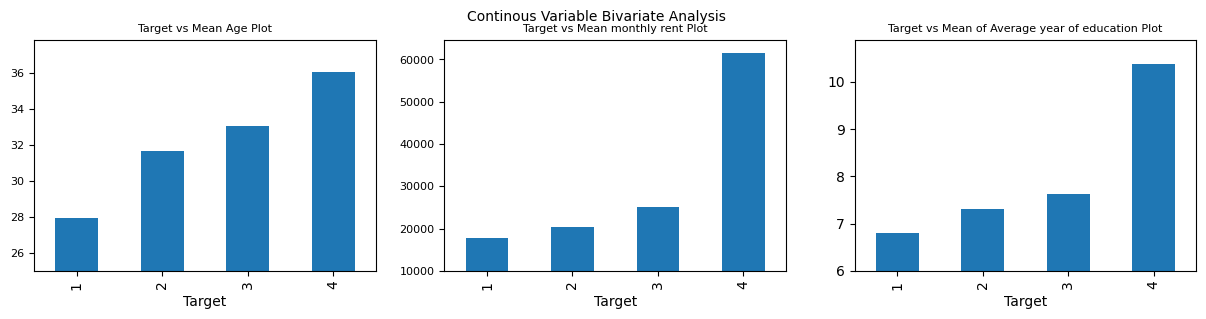

In [333]:
fig = plt.figure(figsize=(15,3))
fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(1, 3, 1)
income_train_df.groupby('Target')['age'].mean().plot(kind='bar')
plt.ylim(25)
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Target vs Mean Age Plot",fontsize=8)
plt.subplot(1, 3, 2)
income_train_df.groupby('Target')['v2a1'].mean().plot(kind='bar')
plt.ylim(10000)
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Target vs Mean monthly rent Plot",fontsize=8)
plt.subplot(1, 3, 3)
income_train_df.groupby('Target')['meaneduc'].mean().plot(kind='bar')
plt.ylim(6)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Target vs Mean of Average year of education Plot",fontsize=8)
plt.show()


##### Target Variable 
  - 1 : Extreme Poverty
  - 2 : Moderate Poverty
  - 3 : Vulnerable Households
  - 4 : Non-vulnerable Households

Inference

Nominal Columns 

In [334]:
len(nominal_cols)

27

In [335]:
def chisq(df,columns):
    target='Target'
    col_name=columns 
    for i in col_name:
        stat, p, dof, expected = chi2_contingency(df[[i,f"{target}"]])
        alpha = 0.05
        print("\n")
        print("**************************************************************************************************************")
        print(f"Dependent Variable {i} \n Independent Variable {target}")
        print(f"P-Value {p} \n DOF {dof} \n Threshold {alpha}")
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (Reject H0) Variable is Significant')
        else:
            print('Independent (Accept H0) Variable is not Significant')    
    

In [336]:
#nominal_cols_status=
chisq(income_train_df,nominal_cols)



**************************************************************************************************************
Dependent Variable rooms 
 Independent Variable Target
P-Value 1.0 
 DOF 9556 
 Threshold 0.05
p value is 1.0
Independent (Accept H0) Variable is not Significant


**************************************************************************************************************
Dependent Variable r4h1 
 Independent Variable Target
P-Value 4.526683632465941e-07 
 DOF 9556 
 Threshold 0.05
p value is 4.526683632465941e-07
Dependent (Reject H0) Variable is Significant


**************************************************************************************************************
Dependent Variable r4h2 
 Independent Variable Target
P-Value 1.0 
 DOF 9556 
 Threshold 0.05
p value is 1.0
Independent (Accept H0) Variable is not Significant


**************************************************************************************************************
Dependent Variable r4h3 
 Independ

In [337]:
select_Cols_nominal=['r4h1', 'r4m1', 'r4t1', 'escolari', 'hogar_nin', 'rez_esc', 'dependency', 'edjefe', 'edjefa']

In [444]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='r4h1',aggfunc='count').fillna(0)

r4h1,0,1,2,3,4,5
Target,,,,,,
1,394.0,219.0,126.0,12.0,10.0,13.0
2,909.0,441.0,181.0,27.0,0.0,0.0
3,825.0,316.0,74.0,0.0,6.0,0.0
4,4590.0,1165.0,226.0,14.0,0.0,9.0


In [445]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='r4m1',aggfunc='count').fillna(0)

r4m1,0,1,2,3,4,6
Target,,,,,,
1,364.0,218.0,147.0,45.0,0.0,0.0
2,932.0,402.0,165.0,34.0,16.0,9.0
3,785.0,348.0,68.0,20.0,0.0,0.0
4,4557.0,1234.0,201.0,12.0,0.0,0.0


In [447]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='r4t1',aggfunc='count').fillna(0)

r4t1,0,1,2,3,4,5,7
Target,,,,,,,
1,228.0,176.0,185.0,98.0,42.0,32.0,13.0
2,598.0,416.0,320.0,159.0,40.0,16.0,9.0
3,546.0,402.0,210.0,42.0,21.0,0.0,0.0
4,3618.0,1570.0,689.0,107.0,11.0,0.0,9.0


In [448]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='escolari',aggfunc='count').fillna(0)

escolari,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Target,,,,,,,,,,,,,,,,,,,,,,
1,199.0,38.0,46.0,51.0,44.0,42.0,143.0,40.0,43.0,31.0,13.0,59.0,10.0,5.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
2,307.0,65.0,70.0,106.0,75.0,83.0,371.0,91.0,83.0,92.0,35.0,119.0,27.0,8.0,11.0,6.0,5.0,4.0,0.0,0.0,0.0,0.0
3,200.0,37.0,56.0,69.0,46.0,53.0,305.0,74.0,71.0,78.0,44.0,121.0,24.0,17.0,11.0,11.0,1.0,3.0,0.0,0.0,0.0,0.0
4,601.0,107.0,146.0,175.0,141.0,168.0,1166.0,283.0,301.0,411.0,205.0,824.0,235.0,169.0,290.0,360.0,188.0,192.0,8.0,9.0,4.0,21.0


In [449]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='rez_esc',aggfunc='count').fillna(0)

rez_esc,0.0,1.0,2.0,3.0,4.0,5.0
Target,,,,,,
1,716,28,15,5,7,3
2,1438,62,31,17,9,1
3,1146,43,14,14,2,2
4,5839,94,38,19,11,3


In [450]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='dependency',aggfunc='count').fillna(0)

dependency,0.000000,0.166667,0.200000,0.222222,0.250000,0.285714,0.333333,0.400000,0.500000,0.600000,0.666667,0.714286,0.750000,0.800000,0.833333,1.000000,1.200000,1.250000,1.333333,1.500000,1.666667,1.750000,2.000000,2.250000,2.500000,3.000000,3.500000,4.000000,5.000000,6.000000,8.000000
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,81.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,93.0,0.0,25.0,0.0,7.0,0.0,0.0,138.0,0.0,0.0,7.0,90.0,8.0,0.0,132.0,13.0,28.0,56.0,0.0,35.0,12.0,7.0,26.0
2,104.0,0.0,0.0,0.0,20.0,0.0,44.0,7.0,156.0,0.0,80.0,0.0,42.0,9.0,0.0,398.0,0.0,9.0,7.0,205.0,0.0,11.0,237.0,0.0,7.0,104.0,9.0,25.0,12.0,0.0,72.0
3,86.0,7.0,18.0,0.0,30.0,0.0,76.0,14.0,179.0,8.0,55.0,0.0,21.0,9.0,11.0,341.0,0.0,0.0,21.0,149.0,0.0,0.0,84.0,0.0,14.0,20.0,0.0,10.0,0.0,0.0,68.0
4,1476.0,0.0,72.0,11.0,210.0,9.0,462.0,63.0,1069.0,0.0,327.0,12.0,28.0,0.0,0.0,1315.0,11.0,9.0,49.0,269.0,0.0,0.0,277.0,0.0,28.0,56.0,9.0,30.0,0.0,0.0,212.0


In [451]:
pd.pivot_table(income_train_df,values='Id',index='Target',columns='edjefe',aggfunc='count').fillna(0)

edjefe,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Target,,,,,,,,,,,,,,,,,,,,,,
1,462.0,19.0,37.0,53.0,10.0,6.0,94.0,27.0,20.0,10.0,3.0,27.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,703.0,34.0,50.0,78.0,30.0,61.0,352.0,34.0,22.0,77.0,12.0,82.0,0.0,8.0,0.0,0.0,9.0,6.0,0.0,0.0,0.0,0.0
3,451.0,16.0,37.0,50.0,31.0,58.0,295.0,25.0,37.0,68.0,16.0,56.0,17.0,8.0,16.0,21.0,5.0,14.0,0.0,0.0,0.0,0.0
4,2146.0,54.0,70.0,126.0,66.0,97.0,1104.0,148.0,178.0,331.0,80.0,586.0,96.0,87.0,188.0,262.0,120.0,182.0,19.0,14.0,7.0,43.0


In [415]:
meles12=pd.DataFrame((income_train_df.groupby(['Target','r4h1'])['Id'].count()).reset_index())

In [434]:
meles12_1=meles12[meles12['Target']==1]
meles12_1.columns=['Target','r4h1','Per of pop']
meles12_1['Per of pop']=meles12_1['Per of pop'].apply(lambda x:round(x/774*100,2))
meles12_1=meles12_1.set_index('r4h1')
meles12_2=meles12[meles12['Target']==2]
meles12_2.columns=['Target','r4h1','Per of pop']
meles12_2['Per of pop']=meles12_2['Per of pop'].apply(lambda x:round(x/1558*100,2))
meles12_2=meles12_2.set_index('r4h1')

meles12_3=meles12[meles12['Target']==3]
meles12_3.columns=['Target','r4h1','Per of pop']
meles12_3['Per of pop']=meles12_3['Per of pop'].apply(lambda x:round(x/1221*100,2))
meles12_3=meles12_3.set_index('r4h1')

meles12_4=meles12[meles12['Target']==4]
meles12_4.columns=['Target','r4h1','Per of pop']
meles12_4['Per of pop']=meles12_4['Per of pop'].apply(lambda x:round(x/6004*100,2))
meles12_4=meles12_4.set_index('r4h1')


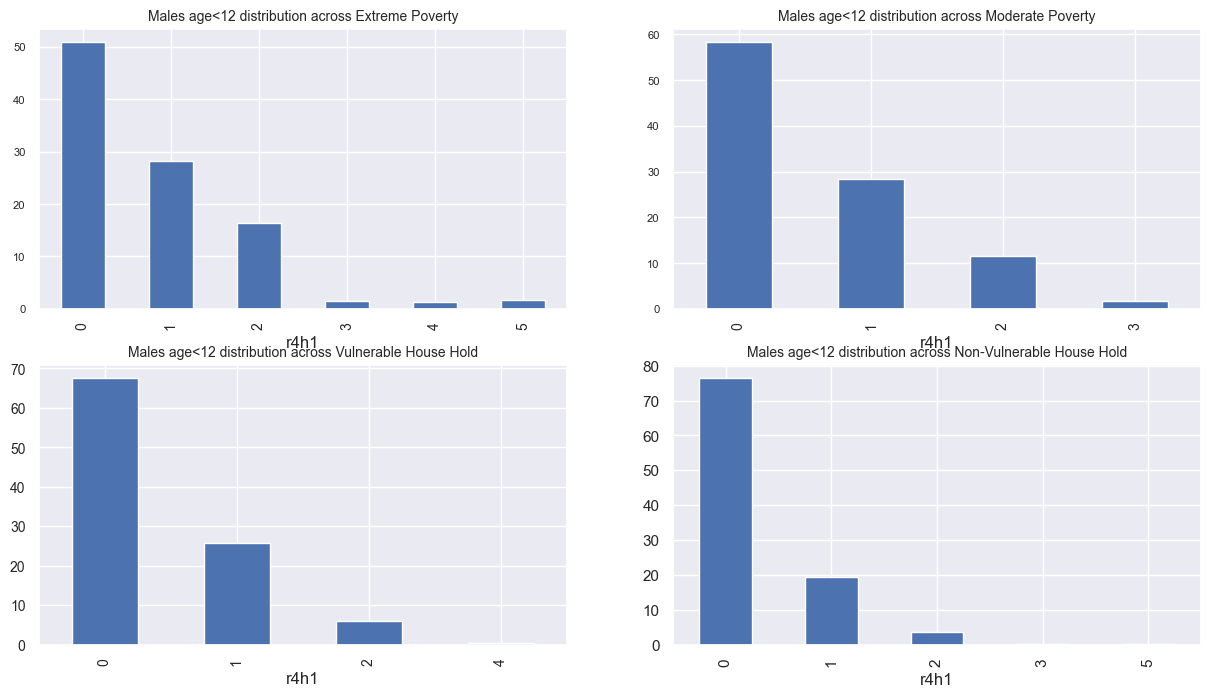

In [454]:
fig = plt.figure(figsize=(15,8))
#fig.suptitle('Continous Variable Bivariate Analysis',fontsize=10)
plt.subplot(2, 2, 1)
meles12_1['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Males age<12 distribution across Extreme Poverty",fontsize=10)
plt.subplot(2, 2, 2)
meles12_2['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.title("Males age<12 distribution across Moderate Poverty",fontsize=10)
plt.subplot(2, 2, 3)
meles12_3['Per of pop'].plot(kind='bar')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Males age<12 distribution across Vulnerable House Hold",fontsize=10)
plt.subplot(2, 2, 4)
meles12_4['Per of pop'].plot(kind='bar')
plt.title("Males age<12 distribution across Non-Vulnerable House Hold",fontsize=10)
plt.show()

r4h1,0,1,2,3,4,5
Target,,,,,,
1,394.0,219.0,126.0,12.0,10.0,13.0
2,909.0,441.0,181.0,27.0,NaN,NaN
3,825.0,316.0,74.0,NaN,6.0,NaN
4,4590.0,1165.0,226.0,14.0,NaN,9.0


<AxesSubplot: xlabel='Target'>

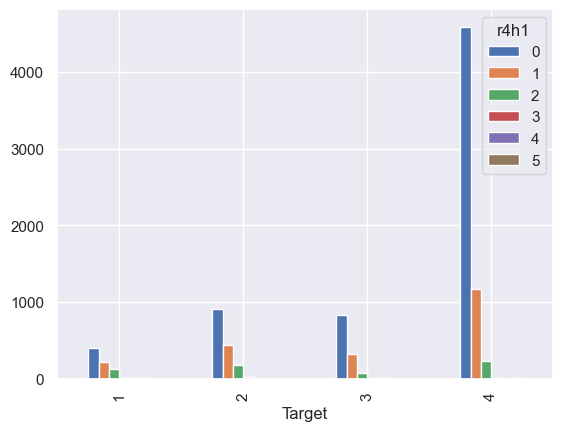

In [363]:
sns.set_theme()
data=income_train_df
pd.pivot_table(income_train_df,values='Id',index='Target',columns='r4h1',aggfunc='count').plot.bar()
#f, ax = plt.subplots(figsize=(15, 6))
#sns.heatmap(data, annot=True, fmt="d", linewidths=.5, ax=ax)

In [355]:
meles12

,Target,r4h1,Id
0,1,0,394
1,1,1,219
2,1,2,126
3,1,3,12
4,1,4,10
5,1,5,13
6,2,0,909
7,2,1,441
8,2,2,181
9,2,3,27


In [362]:
income_train_df['Target'].value_counts()

4    6004
2    1558
3    1221
1     774
Name: Target, dtype: int64

In [ ]:
sns.countplot(data=income_train_df,X='Target',y='r4h1')

r4h1: Males younger than 12 years of age

r4m1: Females younger than 12 years of age

r4t1: persons younger than 12 years of age

escolari: years of schooling

hogar_nin: Number of children 0 to 19 in household

rez_esc: Years behind in school

dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [338]:
income_train_df[select_Cols_nominal]

,r4h1,r4m1,r4t1,escolari,hogar_nin,rez_esc,dependency,edjefe,edjefa
0,0,0,0,10,0,0.0,0.00,10.0,0.0
1,0,0,0,12,0,0.0,8.00,12.0,0.0
2,0,0,0,11,0,0.0,8.00,0.0,11.0
3,0,1,1,9,2,1.0,1.00,11.0,0.0
4,0,1,1,11,2,0.0,1.00,11.0,0.0
...,...,...,...,...,...,...,...,...,...
9552,0,1,1,9,1,0.0,0.25,9.0,0.0
9553,0,1,1,0,1,0.0,0.25,9.0,0.0
9554,0,1,1,5,1,0.0,0.25,9.0,0.0
9555,0,1,1,11,1,0.0,0.25,9.0,0.0


In [343]:
len(yes_no_columns)

101

chi square on yes_no_columns 

In [339]:
#nominal_cols_status=
chisq(income_train_df,yes_no_columns)



**************************************************************************************************************
Dependent Variable hacdor 
 Independent Variable Target
P-Value 1.6950851807802865e-13 
 DOF 9556 
 Threshold 0.05
p value is 1.6950851807802865e-13
Dependent (Reject H0) Variable is Significant


**************************************************************************************************************
Dependent Variable hacapo 
 Independent Variable Target
P-Value 8.126047911289306e-08 
 DOF 9556 
 Threshold 0.05
p value is 8.126047911289306e-08
Dependent (Reject H0) Variable is Significant


**************************************************************************************************************
Dependent Variable v14a 
 Independent Variable Target
P-Value 1.0 
 DOF 9556 
 Threshold 0.05
p value is 1.0
Independent (Accept H0) Variable is not Significant


**************************************************************************************************************

In [344]:
selected_yes_no_cols=["hacdor" ,"hacapo" ,"pareddes" ,"paredfibras" ,"pisonatur" ,"pisonotiene" ,"techocane" ,"abastaguano" ,"noelec" ,"sanitario1" ,"sanitario5" ,"energcocinar1" ]

In [455]:
income_train_df[selected_yes_no_cols[0]]

0       0
1       0
2       0
3       0
4       0
       ..
9552    0
9553    0
9554    0
9555    0
9556    0
Name: hacdor, Length: 9557, dtype: int64

<AxesSubplot: xlabel='Target,hacdor'>

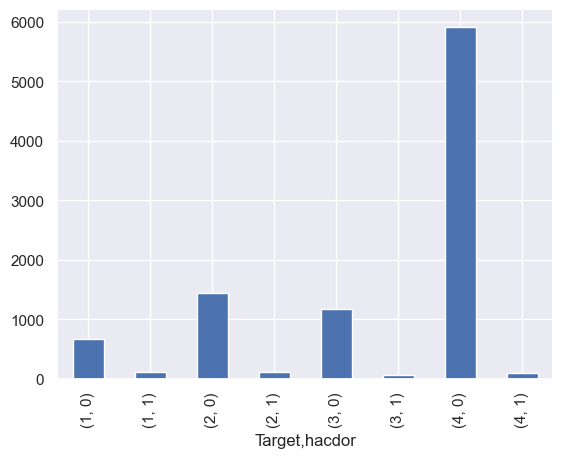

In [459]:
income_train_df.groupby(['Target','hacdor'])['Id'].count().plot.bar()